<a href="https://colab.research.google.com/github/ngot23/MachineLearningProblemSets/blob/master/TED_Talks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 4 - TED Talks

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rounakbanik/ted-talks)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- The `ratings` column is in dictionary format. How should we handle them?
- Same for `related_talks` and `tags` column
- Can you find the `year` of the talks?
- And more...

**refer to TED Data Analysis**

In [ ]:
# Start your codes here!
from google.colab import drive
drive.mount('/content/gdrive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ted.csv')

# df.head(10)

In [ ]:
print (df.columns)

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')


In [ ]:
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

In [ ]:
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [ ]:
# df.head(1)
len(df)

2550

# Most Viewed Talks of All Time

In [ ]:
mydata = df[['name', 'title', 'published_date', 'duration', 'languages', 'views']].sort_values(by='views', ascending=False)[:15]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


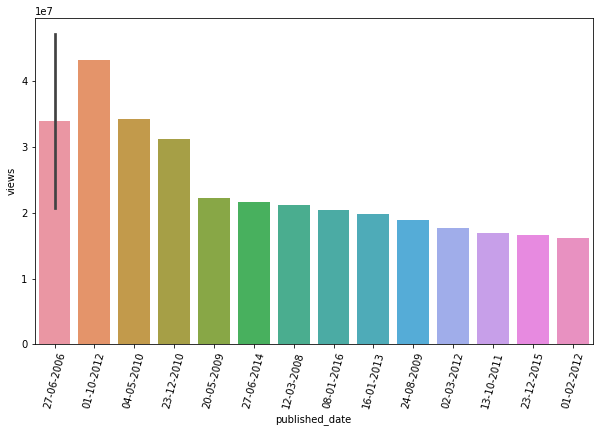

In [ ]:
# mydata.head(10)
plt.figure(figsize = (10, 6))

plt.xticks(rotation = 75)
sns.barplot(x = 'published_date', y = 'views', data = mydata)
plt.show()

**views distributions**

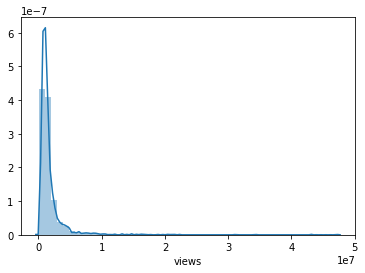

In [ ]:
sns.distplot(df['views'])

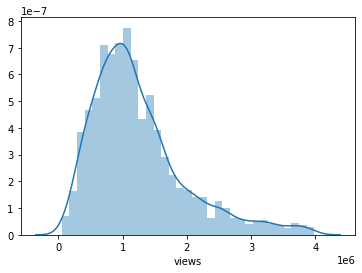

In [ ]:
sns.distplot(df[ df['views'] < 0.4e7 ]['views'])

In [ ]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

**Analysing TED Talks by the month and the year**

In [ ]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [ ]:
df['month'] = df['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

In [ ]:
month_df = pd.DataFrame(df['month'].value_counts()).reset_index()
# month_df.reset_index()
# month_df = 
month_df.columns = ['month', 'talks']

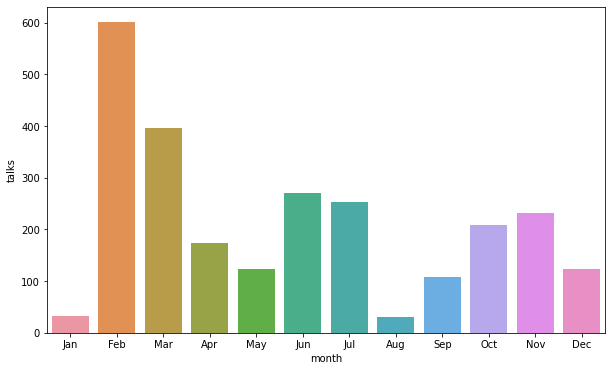

In [ ]:
# month_df
plt.figure(figsize = (10, 6))
sns.barplot(x = 'month', y = 'talks', data = month_df, order = month_order)
plt.show()

**distribution for tedx only**

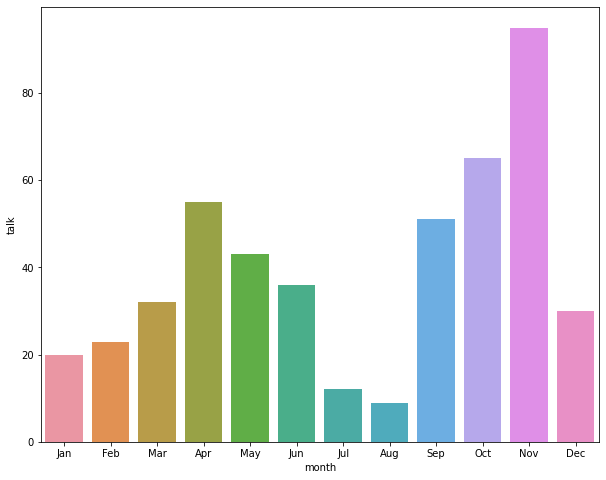

In [ ]:
df_tedx = df[df['event'].str.contains('TEDx')]
month_df_tedx = pd.DataFrame(df_tedx['month'].value_counts()).reset_index()
month_df_tedx.columns = ['month', 'talk']
plt.figure(figsize = (10, 8))
sns.barplot(x = 'month', y = 'talk', data = month_df_tedx, order = month_order)
plt.show()

In [ ]:
def getday(x):
    day, month, year = (int(i) for i in x.split('-'))    
    answer = datetime.date(year, month, day).weekday()
    return day_order[answer]

In [ ]:
df['day'] = df['film_date'].apply(getday)


In [ ]:
day_df = pd.DataFrame(df['day'].value_counts()).reset_index()
day_df.columns = ['day', 'talks']

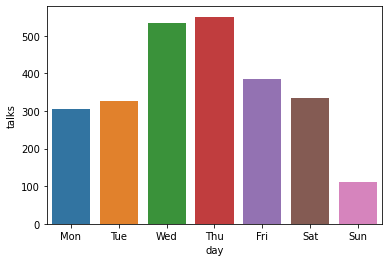

In [ ]:
sns.barplot(x='day', y='talks', data=day_df, order=day_order)

**Lets visualize the number of TED talks through the years and check if our hunch that they have grown significantly is indeed true.**

In [ ]:
df['year'] = df['film_date'].apply(lambda x: x.split('-')[2])
year_df = pd.DataFrame(df['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']

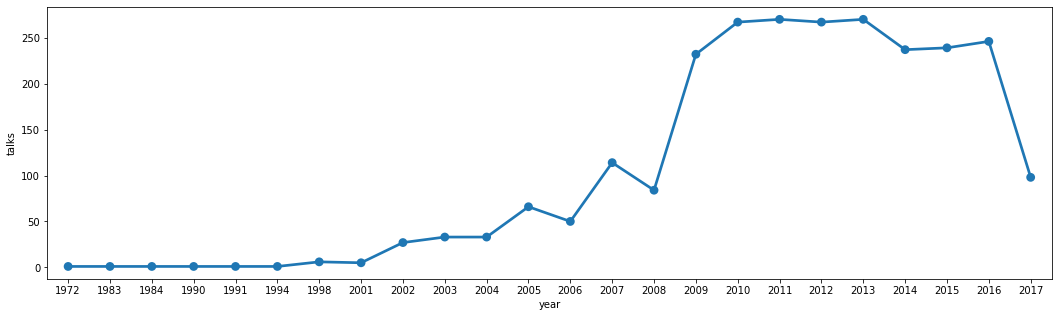

In [ ]:
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_df)

# TED Speakers

In [ ]:
speaker_df = df.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


In [ ]:
occupation_df = df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)
occupation_df

,occupation,appearances
1426,Writer,45
83,Artist,34
413,Designer,34
753,Journalist,33
515,Entrepreneur,31
...,...,...
554,"Eye surgeon, inventor",1
553,"Explorer, inventor and outer space dreamer",1
552,"Explorer, ethnographer",1
551,Explorer and filmmaker,1


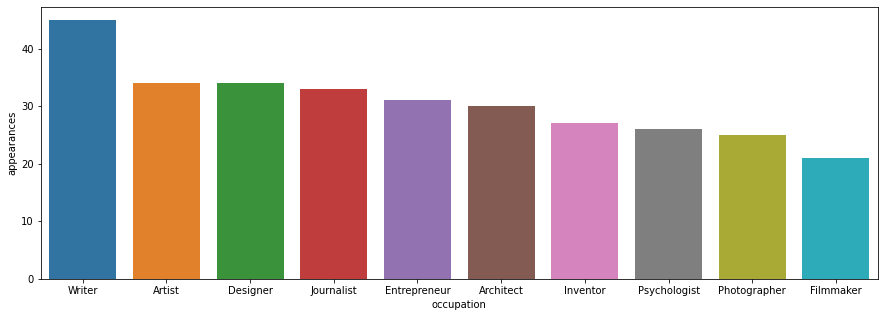

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_df.head(10))
plt.show()


# ted event

In [ ]:
events_df = df[['title', 'event']].groupby('event').count().reset_index()
events_df.columns = ['event', 'talks']
events_df = events_df.sort_values('talks', ascending=False)
events_df.head(10)

,event,talks
64,TED2014,84
59,TED2009,83
63,TED2013,77
66,TED2016,77
65,TED2015,75
99,TEDGlobal 2012,70
61,TED2011,70
60,TED2010,68
98,TEDGlobal 2011,68
57,TED2007,68


#ted languages

In [ ]:
df['languages'].describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

In [ ]:
df[df['languages'] == 72]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views,month,day,year
973,Matt Cutts: Try something new for 30 days,Try something new for 30 days,"Is there something you've always meant to do, ...",Matt Cutts,Technologist,1,207,TED2011,03-03-2011,01-07-2011,736,"['culture', 'success']",72,"[{'id': 10, 'name': 'Inspiring', 'count': 6171...","[{'id': 947, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/matt_cutts_try_somet...,8838874,Mar,Thu,2011
